<a href="https://colab.research.google.com/github/julsCadenas/GoogleColabNoteBooks/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

### TEST CODE

In [26]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

shape prints the size of the data frame

In [27]:
dftrain.shape

(627, 9)

In [28]:
dfeval.shape

(264, 9)

In [29]:
y_train.shape

(627,)

In [30]:
y_eval.shape

(264,)

head prints the first five contents

In [12]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


describe creates a basic statistical analysis

In [10]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [8]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [11]:
dfeval.describe()

,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000
mean,28.720985,0.469697,0.386364,27.023880
std,14.157538,0.978393,0.837775,34.973108
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,13.250000
75%,35.250000,1.000000,0.000000,27.900000
max,74.000000,8.000000,6.000000,263.000000


create a bar graph of the sexes of the people

<Axes: ylabel='sex'>

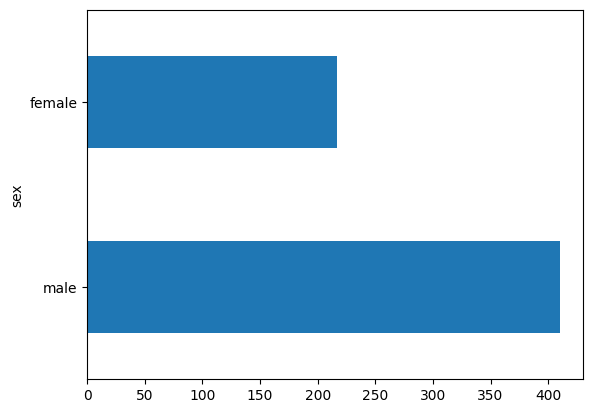

In [13]:
dftrain.sex.value_counts().plot(kind='barh')

([<matplotlib.axis.XTick at 0x7d8572a17910>,
 [Text(0, 0, 'Deaths'), Text(1, 0, 'Survivors')])

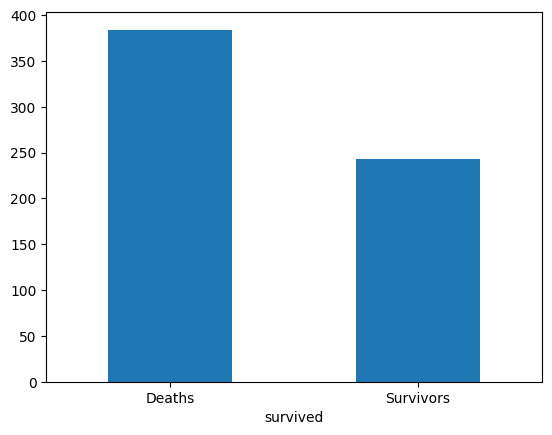

In [19]:
y_train.value_counts().plot(kind='bar')
plt.xticks(ticks=[0, 1], labels=['Deaths', 'Survivors'], rotation=0)

SEPARATING COLUMNS BY CATEGORY (TEXT AND NUMBERS)

In [34]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

INPUT FUNCTION

In [35]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

CREATING A MODEL

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

TRAINING THE MODEL

In [38]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on testing data

clear_output()  # clears console output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.7537879


In [47]:
res = list(linear_est.predict(eval_input_fn))
num = 3
print(dfeval.loc[num])
print(y_eval.loc[num])
print(res[num]['probabilities'])

sex                        female
age                          55.0
n_siblings_spouses              0
parch                           0
fare                         16.0
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 3, dtype: object
1
[0.25796244 0.7420374 ]
